In [1]:
### Steps to solve Emergency vs Non-Emergency vehicle classification problem using Dropout
## 1. Loading the dataset
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score


# reading the csv file
data = pd.read_csv('../data/Dataset/emergency_classification.csv')

print(data.head())

  image_names  emergency_or_not
0       0.jpg                 1
1       1.jpg                 1
2       2.jpg                 1
3       3.jpg                 1
4       4.jpg                 1


In [2]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

# load images and store it in numpy array
# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('../data/Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

In [3]:
# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values


In [4]:
## 2. Pre-processing the data
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)

print(X.shape)


(2352, 150528)


In [5]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

print(X.min(), X.max())



0.0 1.0


In [6]:
## 3. Creating training and validation set
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

print((X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape))


((1646, 150528), (1646,)) ((706, 150528), (706,))


In [7]:


## 4. Defining the model architecture
### <ol>Adding dropout layer(s)</ol>
# importing the dropout layer
from keras.layers import Dropout

# defining the model architecture with dropout layer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))


2024-02-03 17:13:51.758058: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-03 17:13:51.758146: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-02-03 17:13:51.758160: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-02-03 17:13:51.758541: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-03 17:13:51.758821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
## 5. Compiling the model

# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)



In [9]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

## 6. Training the model using Dropout
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

## 7. Evaluating model performance 
# accuracy on validation set
# Corrected code:
predictions = model.predict(X_valid)
predictions_classes = (predictions > 0.5).astype(int)  # Convert probabilities to binary class labels
print('Accuracy on validation set:', accuracy_score(y_valid, predictions_classes) * 100, '%')


Epoch 1/100


2024-02-03 17:14:39.434243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-02-03 17:14:39.470557: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 3s 188ms/step - loss: 0.7195 - accuracy: 0.5371 - val_loss: 0.6919 - val_accuracy: 0.5609
Epoch 2/100
13/13 [==============================] - 1s 79ms/step - loss: 0.7102 - accuracy: 0.5474 - val_loss: 0.6878 - val_accuracy: 0.5609
Epoch 3/100
13/13 [==============================] - 1s 74ms/step - loss: 0.6899 - accuracy: 0.5717 - val_loss: 0.6934 - val_accuracy: 0.5609
Epoch 4/100
13/13 [==============================] - 1s 73ms/step - loss: 0.6936 - accuracy: 0.5644 - val_loss: 0.6840 - val_accuracy: 0.5609
Epoch 5/100
13/13 [==============================] - 1s 73ms/step - loss: 0.6913 - accuracy: 0.5535 - val_loss: 0.6882 - val_accuracy: 0.5609
Epoch 6/100
13/13 [==============================] - 1s 73ms/step - loss: 0.6952 - accuracy: 0.5735 - val_loss: 0.6891 - val_accuracy: 0.5609
Epoch 7/100
13/13 [==============================] - 1s 75ms/step - loss: 0.6909 - accuracy: 0.5468 - val_loss: 0.6891 - val_accuracy: 0.5609
Epoch 8/100
13/13

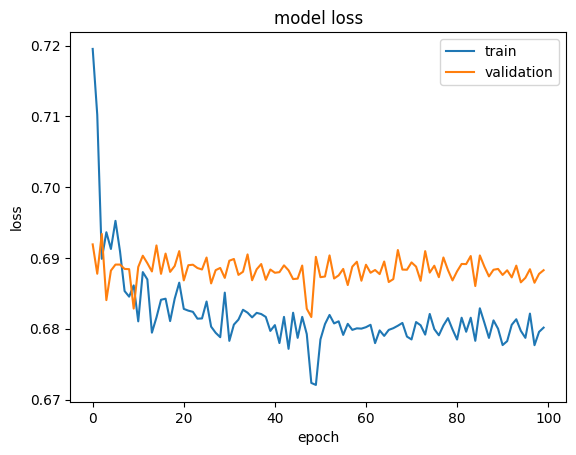

In [10]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()